## Notebook 6A - Wed/Thurs
### Contour plots applied to visualizing electric potential
### Total points: 6
#### PHYS 225 Intro to Computational Physics, Fall 2020

![Example contour plot](dipole_contour_example.png)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

# Example: Making plots of 3 or more variables with `np.meshgrid()`



Making plots of a function like $ z = \sin(x)\sin(y) $ requires evaluating the function over a 2D set of points in the $xy$ plane.  The `np.meshgrid()` function makes it easy to do this calculations without loops. 




## What does `np.meshgrid()` do?

Imagine a grid of points in the $xy$ plane, and you want to plot a function over that region of points. The grid of points would be...
$$\begin{matrix} 
(x_1, y_1) & (x_2,y_1) & (x_3,y_1) \\ 
(x_1, y_2) & (x_2,y_2) & (x_3,y_2) \\ 
(x_1, y_3) & (x_2,y_3) & (x_3,y_3) 
\end{matrix}$$

Meshgrid allows you to create two matrices, one with all the x-coordinates and one with all the y-coordinates.
$$ X = \left(\begin{matrix} 
x_1 & x_2 & x_3 \\ 
x_1 & x_2 & x_3 \\ 
x_1 & x_2 & x_3 
\end{matrix}\right),
Y = \left(\begin{matrix} 
y_1 & y_1 & y_1 \\ 
y_2 & y_2 & y_2 \\ 
y_3 & y_3 & y_3 
\end{matrix}\right)$$

## Table comparing `np.linspace()` and `np.meshgrid()`

| ----- Plot type ----- | Array needed | Numpy function |
|:--|:-:|:-:|
| $y = f(x)$ | 1-D array of $x$ values| `np.linspace()` |
| $z = g(x,y)$ | 2-D arrays of $x$ and $y$ values | `np.meshgrid()` |
| $w = h(x,y,z)$ | 3-D arrays of $x$, $y$, and $z$ values |  `np.meshgrid()` |


#### Creating a meshgrid requires two steps
1. Define the 1D ranges grid points along each axis.
2. Use the 1D ranges to create the 2D (or 3D, 4D, ...) meshgrid.

In [2]:
# Step 1: Define the 1D ranges

xrange = np.linspace(-5,5,11)  # 1D array of x values
yrange = np.linspace(0,7,8)  # 1D array of y values

# Step 2: Define the meshgrid

X, Y = np.meshgrid(xrange, yrange) # "Unpack" the meshgrid output directly into the variables X and Y
print("Array of x-coordinates:\n  X = \n", X)
print("Array of y-coordinates:\n  Y = \n", Y)

Array of x-coordinates:
  X = 
 [[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]]
Array of y-coordinates:
  Y = 
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]
 [7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.]]


# Task 1: Create a meshgrid
Create a meshgrid that goes over the range $-2\pi \leq x \leq 2\pi$ in 20 grid points and the range $-3 \leq y \leq 3$ in 25 grid points. Store the resulting meshgrids in the arrays `X1` and `Y1`

In [3]:
""" Create the meshgrid described in Task 1 """

### BEGIN SOLUTION
xrange = np.linspace(-2*np.pi, 2*np.pi, 20)
yrange = np.linspace(-3, 3, 25)
X1, Y1 = np.meshgrid( xrange, yrange )
### END SOLUTION

In [4]:
""" Test cases for meshgrids created in Task 1 """

assert abs(np.max(X1) - 2*np.pi) < 1e-10
assert abs(np.min(X1) - (-2*np.pi)) < 1e-10
assert abs(np.max(Y1) - 3) < 1e-10
assert abs(np.min(Y1) - (-3)) < 1e-10
assert X1.shape == (25,20)  # check dimensions of meshgrids
assert Y1.shape == (25,20)  # check dimensions of meshgrids
assert abs( X1.mean() ) < 1e-6
assert abs( Y1.mean() ) < 1e-6

# Using meshgrid to create a Contour Plot of the function $z = f(x,y) = x^2 - y^2$.
The function is a [hyperbolic paraboloid](http://mathworld.wolfram.com/HyperbolicParaboloid.html).
![Hyperbolic Paraboloid from MathWorld](http://mathworld.wolfram.com/images/eps-gif/HyperbolicParaboloid_500.gif)

The steps for creating the plot are
1. Define array representing x-range (limits and step size)
1. Define array representing y-range (limits and step size)
1. Use `np.meshgrid()` to define the `X` and `Y` 2D arrays
1. Calculate `Z = f(X,Y)` where `f` is a function of your choosing.
1. Call `plt.contour(X,Y,Z)

In [5]:
def hyp_para(x, y) :
    return x**2 - y**2

[[  0.  -9. -16. -21. -24. -25. -24. -21. -16.  -9.   0.]
 [  9.   0.  -7. -12. -15. -16. -15. -12.  -7.   0.   9.]
 [ 16.   7.   0.  -5.  -8.  -9.  -8.  -5.   0.   7.  16.]
 [ 21.  12.   5.   0.  -3.  -4.  -3.   0.   5.  12.  21.]
 [ 24.  15.   8.   3.   0.  -1.   0.   3.   8.  15.  24.]
 [ 25.  16.   9.   4.   1.   0.   1.   4.   9.  16.  25.]
 [ 24.  15.   8.   3.   0.  -1.   0.   3.   8.  15.  24.]
 [ 21.  12.   5.   0.  -3.  -4.  -3.   0.   5.  12.  21.]
 [ 16.   7.   0.  -5.  -8.  -9.  -8.  -5.   0.   7.  16.]
 [  9.   0.  -7. -12. -15. -16. -15. -12.  -7.   0.   9.]
 [  0.  -9. -16. -21. -24. -25. -24. -21. -16.  -9.   0.]]


Text(0, 0.5, 'Y')

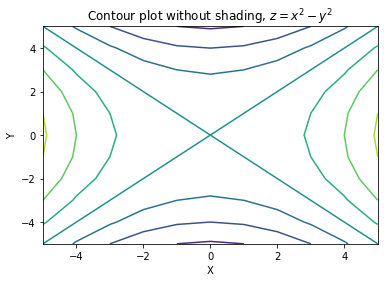

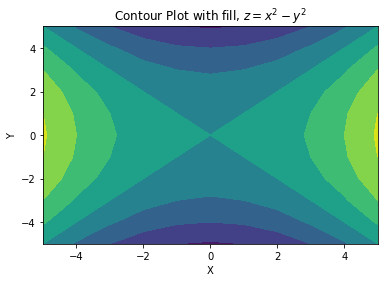

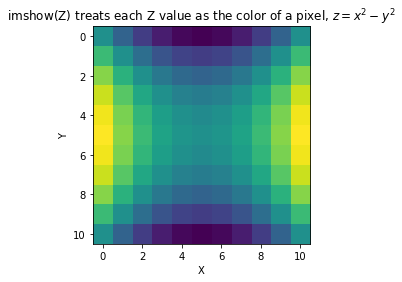

In [6]:
xrange = np.linspace(-5,5,11)  # 1D array of x values
yrange = np.linspace(-5,5,11)  # 1D array of y values
X, Y = np.meshgrid(xrange, yrange)  # create 2D arrays of X and Y values

# Evaluate the hyperbolic paraboloid over 2D array of values
Z = X**2 - Y**2  # compute 2D array of Z values

# Or evaluate the function for the hyperbolic paraboloid defined above
Z = hyp_para(X,Y)

print(Z)

# contour plot without shading
plt.contour(X,Y,Z)
plt.title("Contour plot without shading, $z = x^2 - y^2$")
plt.xlabel("X")
plt.ylabel("Y")


# contour plot with fill
plt.figure()  # create a new figure
plt.contourf(X,Y,Z) 
plt.title("Contour Plot with fill, $z = x^2 - y^2$")
plt.xlabel("X")
plt.ylabel("Y")

# imshow renders each Z value as a color
plt.figure()
plt.imshow(Z)
plt.title("imshow(Z) treats each Z value as the color of a pixel, $z = x^2 - y^2$")
plt.xlabel("X")
plt.ylabel("Y")

# Task 2: Create a filled contour plot of a function of your choice.
Your requirements:
1. Pick an interesting function 
2. Thoughtfully choose the x and y limits to reveal some interesting behavior.
3. The plot title should describe the function. You can use LaTeX inside the label string. `plt.title( "$\sin(x)\sin(y)$" )`

[[2.35619449 2.33536417 2.31366696 ... 0.8279257  0.80622848 0.78539816]
 [2.37702481 2.35619449 2.33445878 ... 0.80713387 0.78539816 0.76456784]
 [2.39872202 2.3779302  2.35619449 ... 0.78539816 0.76366246 0.74287063]
 ...
 [2.39872202 2.3779302  2.35619449 ... 0.78539816 0.76366246 0.74287063]
 [2.37702481 2.35619449 2.33445878 ... 0.80713387 0.78539816 0.76456784]
 [2.35619449 2.33536417 2.31366696 ... 0.8279257  0.80622848 0.78539816]]


Text(0, 0.5, 'Y')

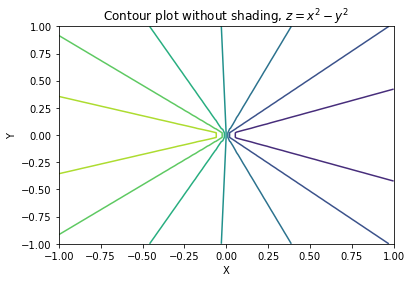

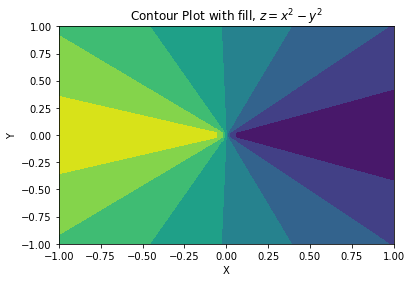

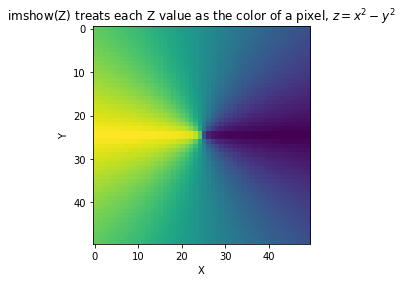

In [11]:
""" Task 2: Create a contour plot for a function of your choice """

### BEGIN SOLUTION
xrange = np.linspace(-1,1,50)  # 1D array of x values
yrange = np.linspace(-1,1,50)  # 1D array of y values
X, Y = np.meshgrid(xrange, yrange)  # create 2D arrays of X and Y values

# Evaluate a spiral where Z = theta
Z = np.arccos(X/(X**2 + Y**2)**0.5)  # compute 2D array of Z values


print(Z)

# contour plot without shading
plt.contour(X,Y,Z)
plt.title("Contour plot without shading, $z = x^2 - y^2$")
plt.xlabel("X")
plt.ylabel("Y")


# contour plot with fill
plt.figure()  # create a new figure
plt.contourf(X,Y,Z) 
plt.title("Contour Plot with fill, $z = x^2 - y^2$")
plt.xlabel("X")
plt.ylabel("Y")

# imshow renders each Z value as a color
plt.figure()
plt.imshow(Z)
plt.title("imshow(Z) treats each Z value as the color of a pixel, $z = x^2 - y^2$")
plt.xlabel("X")
plt.ylabel("Y")

### END SOLUTION

In [45]:
"""Make sure your plot makes sense and has axes labels and a title 
where the function is shown. If the plot is missing these details, you may lose points."""

assert True

# Contour plot tips

#### Adjusting number of levels of the contour plot
Specify the number of levels in the contour plot using  

    plt.contourf(X,Y,Z,21)   # creates a plot with 21 levels
    
#### Add a colorbar to show the color scale
Add a color bar to explain the color scale

    plt.colorbar()    # add the colorbar scale to the plot
    
#### change the color scheme
See the **[full list of available colormaps](https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html)**. You specify the colormap using

    plt.contourf(X,Y,Z,21, cmap = "inferno")

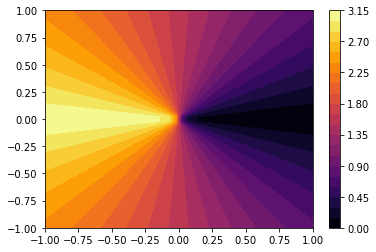

In [12]:
plt.contourf(X,Y,Z,21, cmap = "inferno")  # Increase the number of levels to 21
plt.colorbar()  # add a color bar showing the meaning of color scale

# Task 3: Create a 2nd filled contour plot of a function of your choice.
Your requirements:
1. Pick a different interesting function 
2. Thoughtfully choose the x and y limits to reveal some interesting behavior.
3. Apply the plotting tips
    * Add a colorbar.
    * Increase the number of contour levels.
    * Pick a new colorscale.  (Don't pick "inferno" or the default)

In [47]:
""" Create a contour plot for a function of your choice """

### BEGIN SOLUTION


### END SOLUTION

' Create a contour plot for a function of your choice '

In [48]:
"""Make sure your plot makes sense and has axes labels and a title 
where the function is shown. If the plot is missing these details, you may lose points."""

assert True

# CAUTION about using meshgrid
Consider these two ways (shown in cell below) to define a function that represents the paraboloid $z = x^2 + y^2$.

In [13]:
# The "GOOD" definition for applying meshgrids
# DOES NOT RESHAPE the variables x and y into some other numpy array.
def f1(x,y) :
    z = x**2 + y**2
    return z

# the "BAD" definition for applying meshgrids
# converts x and y into a single numpy array. 
# This will cause problems when evaluating f2(X,Y) over a meshgrid of points
def f2(x,y) :
    rvec = np.array([x,y])
    r = np.linalg.norm(rvec)
    z = r**2
    return z

When the inputs are floating point numbers, both return the exact same result within numerical precision.

In [14]:
# Both method return the same result when evaluated at a single (x,y) point
print(f1(3.0,2.0))
print(f2(3.0,2.0))

13.0
12.999999999999998


[[50. 41. 34. 29. 26. 25. 26. 29. 34. 41. 50.]
 [41. 32. 25. 20. 17. 16. 17. 20. 25. 32. 41.]
 [34. 25. 18. 13. 10.  9. 10. 13. 18. 25. 34.]
 [29. 20. 13.  8.  5.  4.  5.  8. 13. 20. 29.]
 [26. 17. 10.  5.  2.  1.  2.  5. 10. 17. 26.]
 [25. 16.  9.  4.  1.  0.  1.  4.  9. 16. 25.]
 [26. 17. 10.  5.  2.  1.  2.  5. 10. 17. 26.]
 [29. 20. 13.  8.  5.  4.  5.  8. 13. 20. 29.]
 [34. 25. 18. 13. 10.  9. 10. 13. 18. 25. 34.]
 [41. 32. 25. 20. 17. 16. 17. 20. 25. 32. 41.]
 [50. 41. 34. 29. 26. 25. 26. 29. 34. 41. 50.]]


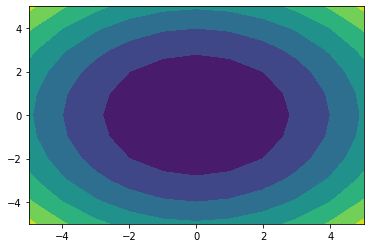

In [15]:
# The "GOOD" definition can be used to make a plot

xrange = np.linspace(-5,5,11)  # 1D array of x values
yrange = np.linspace(-5,5,11)  # 1D array of y values
X, Y = np.meshgrid(xrange, yrange) # 2D arrays of X and Y values
Z = f1(X,Y)  # 2D array of Z values using the first function

print(Z)
plt.contourf(X,Y,Z)

Unfortunately, if you reshape inputs into a numpy array `r_vec = np.array([x,y])`, the evaluation does not work as expected.

In [16]:
# The bad definition cannot be used for making a plot

xrange = np.linspace(-5,5,11)  # 1D array of x values
yrange = np.linspace(-5,5,11)  # 1D array of y values
X, Y = np.meshgrid(xrange, yrange) # 2D arrays of X and Y values
Z = f2(X,Y)  # 2D array of Z values using the second function

print("Z (hope it is a 2D array) = ", Z) # we expect Z to be a 2D array but it actually just a single number!



Z (hope it is a 2D array) =  2420.0000000000005


It turns out Z evaluated to be a single number, not a 2D array! Z cannot be used to plotting.

# Task 4: Use the "good method" for defining a function for the electric potential of a point charge

$$V = \frac{1}{4\pi\epsilon_0}\frac{q}{r}$$

Remember that the "good method" only uses standard math operations, but does not convert the $x$, $y$, $z$ coordinates to a numpy arrray.

**Function name:** `point_charge_potential`

**Inputs:** 
* `x` x-coordinate to evaluate potential at (in meters)
* `y` y-coordinate to evaluate potential at (in meters)
* `z` z-coordinate to evaluate potential at (in meters)
* `xq` x-coordinate of the point charge (in meters)
* `yq` y-coordinate of the point charge (in meters)
* `zq` z-coordinate of the point charge (in meters)
* `q` value of the charge (in Coulombs)

**Outputs:**
* `V` the electric potential (in J/m or N/C)

In [48]:
""" Define a function for the electric potential """

from scipy.constants import epsilon_0

### BEGIN SOLUTION

from scipy.constants import e

def point_charge_potential(x,y,z,xq,yq,zq,q) :
    
    r = ( (x-xq)**2 + (y-yq)**2 + (z-zq)**2 )**0.5
    V  = 1/(4*np.pi*epsilon_0) * q * 1/r
    
    #rvec = np.array([x,y,z], dtype = object)
    #rqvec = np.array([xq,yq,zq], dtype = object)
    #r = np.linalg.norm(rvec - rqvec)
    #V  = 1/(4*np.pi*epsilon_0) * q * 1/r
    
    return V

print( e )
print( point_charge_potential(0,0,1,0,0,0, e) )
print( point_charge_potential(1,2,3,10,-3,6, e) )
print( point_charge_potential(10,20,30,100,-30,60, e))
### END SOLUTION

1.602176634e-19
1.439964547842567e-09
1.3427738645587832e-10
1.3427738645587832e-11


In [49]:
""" Check the point_charge_potential() function"""
from scipy.constants import e  # electron charge  magnitude

assert abs(point_charge_potential(-1,3,6,-1,3,5, e) - 1.4399645351e-09)/1.4399645351e-09 < 1e-5
assert abs(point_charge_potential(-10,30,60,-10,30,50, e) - 1.43996453e-10)/1.43996453e-10 < 1e-5
assert abs(point_charge_potential(-10,30,60,-10,30,50, 10*e) - 1.439964535e-9)/1.439964535e-9 < 1e-5
assert abs(point_charge_potential(1,2,3,10,-3,6, e) - 1.34277385e-10)/1.34277385e-10 < 1e-5
assert abs(point_charge_potential(10,20,30,100,-30,60, e) - 1.34277385e-11)/1.34277385e-11 < 1e-5

# Task 5: Create a filled contour plot of the potential from a single electron

* Pick the $x$ and $y$ ranges to be on the scale of an atom or small molecule.
* Add a colorbar to the plot.

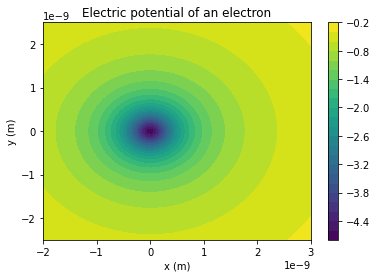

In [50]:
""" Create a plot of the potential from a single point charge """

""" Create a plot of the potential from a single point charge """

from scipy.constants import e  # electron charge in coulombs

### BEGIN SOLUTION


d = 1e-9
xe = 0; ye = 0; ze = 0
xp = d; yp = 0; zp = 0

z_offset = 0.3*d

xrange = np.linspace(-2*d,3*d,50)
yrange = np.linspace(-2.5*d,2.5*d,50)
X, Y = np.meshgrid(xrange, yrange)
Z = point_charge_potential(X,Y,z_offset,xe, ye, ze, -e) # + point_charge_potential(X,Y,z_offset,xp, yp, zp, e)

plt.contourf(X,Y,Z, 21)
plt.colorbar()
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Electric potential of an electron");
### END SOLUTION

In [51]:
""" Make sure your plot values are reasonable and your plot has axes labels and a title."""
assert True

# Task 6: Create a plot of the potential from an electric dipole
Create a contour plot of the potential from an electric dipole composed of a 
 * proton and 
 * electron 
that are separated by $d =$ 1 nm.

You must
1. Use your `point_charge_potential()` function as part of your solution
1. Select coordinates for the proton and electron
1. Select a  range for the meshgrid that allows you to visualize the potential surrounding and between both charges.
1. Add a colorbar to the plot
1. Add labels to X and Y axis.


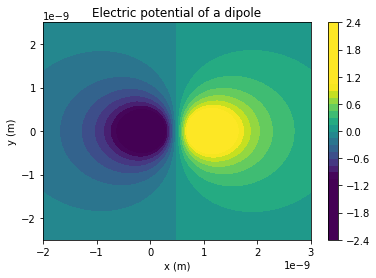

In [52]:
""" Create a plot of the potential from an electric dipole of a proton and electron 
Make sure your plot values are reasonable and your plot has axes labels and a title.
"""

from scipy.constants import e  # electron charge in coulombs

### BEGIN SOLUTION

d = 1e-9
xe = 0; ye = 0; ze = 0
xp = d; yp = 0; zp = 0

z_offset = 0.4*d

xrange = np.linspace(-2*d,3*d,50)
yrange = np.linspace(-2.5*d,2.5*d,50)
X, Y = np.meshgrid(xrange, yrange)
Z = point_charge_potential(X,Y,z_offset,xe, ye, ze, -e) + point_charge_potential(X,Y,z_offset,xp, yp, zp, e)

plt.contourf(X,Y,Z, 30, vmin = -1, vmax = 1)
plt.colorbar()
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Electric potential of a dipole");
#plt.savefig("dipole_contour_example.png")
### END SOLUTION

# Improving your plot when a function "blows up"

Use these tips to improve your solution to go back to Task 6 (plot of the dipole potential) and improve the visualization.

Functions like $$\frac{1}{\sqrt{x^2 + y^2} }$$ get too big and make the color scales hard to use.

There are a few ways to deal with really large value due to things like singularities (divide by zero)
1. **Avoid the getting to close to the singularity where the function blows up.** For the dipoles, you could plot a cross-section that is slightly above or below where the charges are located.
1. **Use a condition statement to crop the extreme values**
1. **Use the function arguments `vmin` and `vmax`**

### Original plot of a point charge doesn't show much with the contour plot

Text(0, 0.5, 'y (m)')

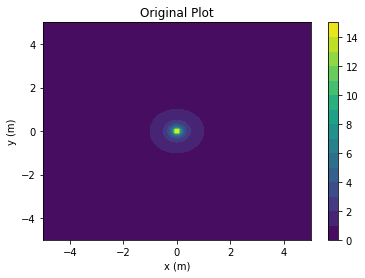

In [34]:
xrange = np.linspace(-5,5,100)  # 1D array of x values
yrange = np.linspace(-5,5,100)  # 1D array of y values
X, Y = np.meshgrid(xrange, yrange) # 2D arrays of X and Y values
Z = 1/(X**2 + Y**2)**0.5  # 2D array of Z values using the first function

plt.contourf(X,Y,Z, 15)
plt.colorbar()
plt.title("Original Plot")
plt.xlabel("x (m)")
plt.ylabel("y (m)")

### Avoid the point where the function "blow up"

Text(0, 0.5, 'y (m)')

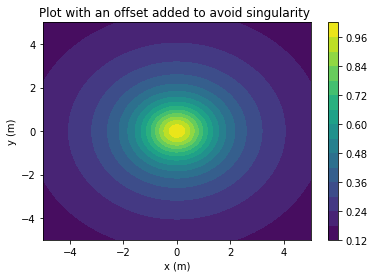

In [35]:
xrange = np.linspace(-5,5,100)  # 1D array of x values
yrange = np.linspace(-5,5,100)  # 1D array of y values
X, Y = np.meshgrid(xrange, yrange) # 2D arrays of X and Y values

offset = 1
Z = 1/(X**2 + Y**2 + offset)**0.5  # 2D array of Z values using the first function

plt.contourf(X,Y,Z, 15)
plt.colorbar()
plt.title("Plot with an offset added to avoid singularity ");
plt.xlabel("x (m)")
plt.ylabel("y (m)")

### Crop the values that are too large

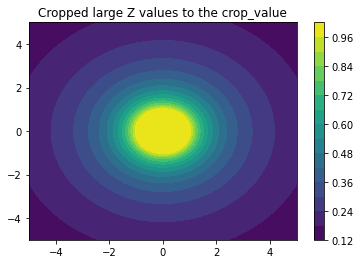

In [36]:
Z = 1/(X**2 + Y**2)**0.5

crop_value  = 1 # crop any values above this value
condition = (Z > crop_value)  # find all the Z values bigger than crop_value
Z[condition] = crop_value # set all the "too big" Z values to crop_value

plt.contourf(X,Y,Z,15)
plt.colorbar()
plt.title("Cropped large Z values to the crop_value");

### Adjust the `vmin` and `vmax` options

Text(0, 0.5, 'y (m)')

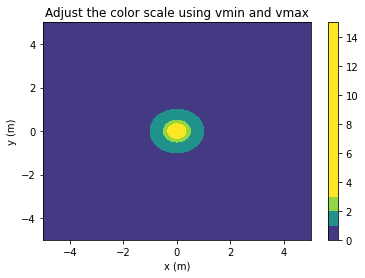

In [37]:
xrange = np.linspace(-5,5,100)  # 1D array of x values
yrange = np.linspace(-5,5,100)  # 1D array of y values
X, Y = np.meshgrid(xrange, yrange) # 2D arrays of X and Y values

Z = 1/(X**2 + Y**2)**0.5  # 2D array of Z values using the first function

plt.contourf(X,Y,Z, 15, vmin = 0, vmax = 3)
plt.colorbar()
plt.title("Adjust the color scale using vmin and vmax")
plt.xlabel("x (m)")
plt.ylabel("y (m)")